In [2]:
!pip install tensorflow==2.12.0

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install opencv-python  sklearn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [7]:
mp_holistic = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [29]:
#MP HOLISTIC


In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   #color conversion
    image.flags.writeable = False    #image is no longer writeable
    results = model.process(image)   #mediapipe actual detection
    image.flags.writeable = True     #image is now writeable
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  #color conversion
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [10]:
def draw_styled_landmarks(image, results):
    # for face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             )
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             )
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             )

In [11]:
cap = cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #Read Feed
        ret, frame =cap.read()

        # making detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks
        draw_styled_landmarks(image, results)

        #show to screen
        cv2.imshow('OpenCV Feed', image)
        # breaking gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
len(results.left_hand_landmarks.landmark)

21

In [13]:
frame

array([[[150, 161, 151],
        [152, 163, 157],
        [153, 163, 162],
        ...,
        [200, 195, 184],
        [197, 193, 182],
        [201, 196, 185]],

       [[148, 160, 155],
        [150, 162, 159],
        [152, 164, 163],
        ...,
        [197, 194, 179],
        [198, 195, 181],
        [201, 197, 184]],

       [[147, 161, 158],
        [149, 162, 160],
        [152, 164, 163],
        ...,
        [199, 194, 177],
        [201, 195, 180],
        [202, 196, 181]],

       ...,

       [[119, 135, 136],
        [119, 133, 133],
        [122, 134, 133],
        ...,
        [ 98, 106,  92],
        [ 97, 105,  91],
        [ 97, 105,  91]],

       [[118, 137, 135],
        [118, 135, 131],
        [120, 135, 129],
        ...,
        [ 95, 102,  90],
        [ 98, 105,  95],
        [ 99, 106,  97]],

       [[118, 137, 135],
        [119, 136, 131],
        [121, 137, 129],
        ...,
        [ 94, 101,  90],
        [ 98, 105,  95],
        [ 99, 106,  97]]

In [14]:
results

mediapipe.python.solution_base.SolutionOutputs

In [15]:
draw_landmarks(frame,results)


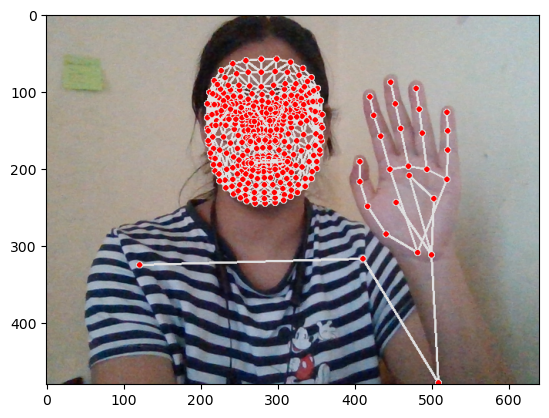

In [16]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [31]:
#Extract keypoints

In [17]:
len(results.left_hand_landmarks.landmark)

21

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [63]:
#do not touch
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
if results.face_landmarks
else np.zeros(1404)

IndentationError: expected an indented block after 'if' statement on line 2 (33196776.py, line 3)

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [22]:
print(face)

[ 0.4403418   0.38502029 -0.03420171 ...  0.51736456  0.2427832
  0.01738537]


In [23]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
result_test = extract_keypoints(results)

In [25]:
result_test 

array([ 0.45503682,  0.31473809, -0.83207524, ...,  0.        ,
        0.        ,  0.        ])

In [26]:
np.save('0', result_test)

In [25]:
np.load('0.npy
        ')

array([ 0.50005651,  0.2595121 , -1.10222352, ...,  0.        ,
        0.        ,  0.        ])

In [80]:
#setup folder for collection--->(array collection)

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30 

# Folder start
#start_folder = 30

In [102]:
#Create three folder each contain 30 folders each folder contain 30 frames 

In [28]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action , str(sequence)))
        except:
            pass

In [36]:
#DONT RUN 
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)

    dir_max = np.max(np.array(os.listdir(dir_path)).astype(int))
    no_sequences = 10 
    for sequence in range(1,no_sequences+1):
        try:  
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

NameError: name 'dir_path' is not defined

In [104]:
#collect keypoints values for training and testing

In [29]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()  

In [33]:
#use to destroy camra while running
cap.release()
cv2.destroyAllWindows()  

In [34]:
# preprocess Data and Create Lables and Features

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(90, 30, 1662)

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
y_test.shape

(5, 3)

In [ ]:
 #build and train LSTM neural network

In [41]:
from tensorflow.keras.models import Sequential  #create sequential nural network
from tensorflow.keras.layers import LSTM,Dense #provieds temprary component to build neural network to perform action detection
from tensorflow.keras.callbacks import TensorBoard #

In [ ]:
#call up log dirctory set up tensorBoard  (to check your tained neural network and check accuracy check with this)

In [42]:
log_dir = os.path.join('logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [45]:
#neural network architecture

In [43]:
model = Sequential()
#add three set of LSTM units 
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [44]:
X.shape  # each video of 30 frames having 1662 keypoints each

(90, 30, 1662)

In [46]:
actions.shape[0]  #3 nuero network

3

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [48]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 6s 108ms/step - loss: 1.3916 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 97ms/step - loss: 11.9764 - categorical_accuracy: 0.3529
Epoch 3/2000
3/3 [==============================] - 0s 96ms/step - loss: 8.3794 - categorical_accuracy: 0.4353
Epoch 4/2000
3/3 [==============================] - 0s 99ms/step - loss: 19.9334 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 100ms/step - loss: 22.5085 - categorical_accuracy: 0.3765
Epoch 6/2000
3/3 [==============================] - 0s 103ms/step - loss: 30.7431 - categorical_accuracy: 0.3765
Epoch 7/2000
3/3 [==============================] - 0s 97ms/step - loss: 37.9855 - categorical_accuracy: 0.4118
Epoch 8/2000
3/3 [==============================] - 0s 101ms/step - loss: 61.8035 - categorical_accuracy: 0.4235
Epoch 9/2000
3/3 [==============================] - 0s 111ms/step - loss: 114.3057 - categorical_accur

3/3 [==============================] - 0s 142ms/step - loss: 0.1641 - categorical_accuracy: 0.9765
Epoch 74/2000
3/3 [==============================] - 0s 141ms/step - loss: 0.1546 - categorical_accuracy: 0.9765
Epoch 75/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.1517 - categorical_accuracy: 0.9529
Epoch 76/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.1428 - categorical_accuracy: 0.9765
Epoch 77/2000
3/3 [==============================] - 0s 146ms/step - loss: 0.1384 - categorical_accuracy: 0.9765
Epoch 78/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.1318 - categorical_accuracy: 0.9765
Epoch 79/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.1268 - categorical_accuracy: 0.9765
Epoch 80/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.1240 - categorical_accuracy: 0.9647
Epoch 81/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.1147 - categorical_accuracy: 0.97

3/3 [==============================] - 0s 127ms/step - loss: 0.0135 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 121ms/step - loss: 0.0102 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 1s 185ms/step - loss: 0.0103 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0079 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.0127 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0051 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0047 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0050 - categorical_accuracy: 1.0000
Epoch 153/2000
3/3 [==============================] - 0s 164ms/step - loss: 0.0043 - categorical_accura

3/3 [==============================] - 0s 129ms/step - loss: 6.3015e-04 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 128ms/step - loss: 6.2007e-04 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 128ms/step - loss: 6.0445e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 127ms/step - loss: 5.9268e-04 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 133ms/step - loss: 5.8239e-04 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 140ms/step - loss: 5.7061e-04 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 122ms/step - loss: 5.6012e-04 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 118ms/step - loss: 5.5003e-04 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 0s 120ms/step - l

3/3 [==============================] - 0s 124ms/step - loss: 2.4084e-04 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.3883e-04 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.3623e-04 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 124ms/step - loss: 2.3340e-04 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.3150e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 146ms/step - loss: 2.2862e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 163ms/step - loss: 2.2698e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 164ms/step - loss: 2.2421e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 163ms/step - l

3/3 [==============================] - 0s 120ms/step - loss: 1.2603e-04 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.2519e-04 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.2411e-04 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.2313e-04 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2180e-04 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2086e-04 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2007e-04 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.1878e-04 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 116ms/step - l

3/3 [==============================] - 0s 133ms/step - loss: 7.1816e-05 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 135ms/step - loss: 7.1455e-05 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 145ms/step - loss: 7.0877e-05 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 142ms/step - loss: 7.0354e-05 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 130ms/step - loss: 6.9972e-05 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 142ms/step - loss: 6.9498e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 142ms/step - loss: 6.8906e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 128ms/step - loss: 6.8437e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 128ms/step - l

3/3 [==============================] - 0s 126ms/step - loss: 4.7377e-05 - categorical_accuracy: 1.0000
Epoch 493/2000
3/3 [==============================] - 0s 130ms/step - loss: 4.7097e-05 - categorical_accuracy: 1.0000
Epoch 494/2000
3/3 [==============================] - 0s 129ms/step - loss: 4.6839e-05 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 0s 135ms/step - loss: 4.6591e-05 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 134ms/step - loss: 4.6384e-05 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 0s 129ms/step - loss: 4.6104e-05 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 131ms/step - loss: 4.5899e-05 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 132ms/step - loss: 4.5620e-05 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 148ms/step - l

3/3 [==============================] - 0s 125ms/step - loss: 3.3344e-05 - categorical_accuracy: 1.0000
Epoch 562/2000
3/3 [==============================] - 0s 114ms/step - loss: 3.3151e-05 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 0s 117ms/step - loss: 3.2992e-05 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.2826e-05 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.2674e-05 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.2556e-05 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.2392e-05 - categorical_accuracy: 1.0000
Epoch 568/2000
3/3 [==============================] - 0s 114ms/step - loss: 3.2218e-05 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 112ms/step - l

3/3 [==============================] - 0s 148ms/step - loss: 2.3246e-05 - categorical_accuracy: 1.0000
Epoch 631/2000
3/3 [==============================] - 0s 163ms/step - loss: 2.3057e-05 - categorical_accuracy: 1.0000
Epoch 632/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.2926e-05 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 0s 135ms/step - loss: 2.2768e-05 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.2635e-05 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 0s 129ms/step - loss: 2.2525e-05 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.2360e-05 - categorical_accuracy: 1.0000
Epoch 637/2000
3/3 [==============================] - 0s 129ms/step - loss: 2.2207e-05 - categorical_accuracy: 1.0000
Epoch 638/2000
3/3 [==============================] - 0s 139ms/step - l

3/3 [==============================] - 0s 141ms/step - loss: 1.4508e-05 - categorical_accuracy: 1.0000
Epoch 700/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.4429e-05 - categorical_accuracy: 1.0000
Epoch 701/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.4370e-05 - categorical_accuracy: 1.0000
Epoch 702/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.4278e-05 - categorical_accuracy: 1.0000
Epoch 703/2000
3/3 [==============================] - 0s 146ms/step - loss: 1.4240e-05 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.4130e-05 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 135ms/step - loss: 1.4067e-05 - categorical_accuracy: 1.0000
Epoch 706/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.4000e-05 - categorical_accuracy: 1.0000
Epoch 707/2000
3/3 [==============================] - 0s 120ms/step - l

3/3 [==============================] - 0s 125ms/step - loss: 9.8574e-06 - categorical_accuracy: 1.0000
Epoch 769/2000
3/3 [==============================] - 0s 119ms/step - loss: 9.7943e-06 - categorical_accuracy: 1.0000
Epoch 770/2000
3/3 [==============================] - 0s 117ms/step - loss: 9.7565e-06 - categorical_accuracy: 1.0000
Epoch 771/2000
3/3 [==============================] - 0s 116ms/step - loss: 9.7004e-06 - categorical_accuracy: 1.0000
Epoch 772/2000
3/3 [==============================] - 0s 117ms/step - loss: 9.6611e-06 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 0s 125ms/step - loss: 9.6219e-06 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 0s 118ms/step - loss: 9.5545e-06 - categorical_accuracy: 1.0000
Epoch 775/2000
3/3 [==============================] - 0s 124ms/step - loss: 9.5111e-06 - categorical_accuracy: 1.0000
Epoch 776/2000
3/3 [==============================] - 0s 121ms/step - l

3/3 [==============================] - 0s 117ms/step - loss: 6.8985e-06 - categorical_accuracy: 1.0000
Epoch 838/2000
3/3 [==============================] - 0s 119ms/step - loss: 6.8620e-06 - categorical_accuracy: 1.0000
Epoch 839/2000
3/3 [==============================] - 0s 124ms/step - loss: 6.8368e-06 - categorical_accuracy: 1.0000
Epoch 840/2000
3/3 [==============================] - 0s 117ms/step - loss: 6.8157e-06 - categorical_accuracy: 1.0000
Epoch 841/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.7961e-06 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 0s 120ms/step - loss: 6.7709e-06 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 0s 119ms/step - loss: 6.7456e-06 - categorical_accuracy: 1.0000
Epoch 844/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.7190e-06 - categorical_accuracy: 1.0000
Epoch 845/2000
3/3 [==============================] - 0s 124ms/step - l

3/3 [==============================] - 0s 128ms/step - loss: 5.3264e-06 - categorical_accuracy: 1.0000
Epoch 907/2000
3/3 [==============================] - 0s 136ms/step - loss: 5.3040e-06 - categorical_accuracy: 1.0000
Epoch 908/2000
3/3 [==============================] - 0s 137ms/step - loss: 5.2843e-06 - categorical_accuracy: 1.0000
Epoch 909/2000
3/3 [==============================] - 0s 142ms/step - loss: 5.2577e-06 - categorical_accuracy: 1.0000
Epoch 910/2000
3/3 [==============================] - 0s 155ms/step - loss: 5.2437e-06 - categorical_accuracy: 1.0000
Epoch 911/2000
3/3 [==============================] - 1s 194ms/step - loss: 5.2254e-06 - categorical_accuracy: 1.0000
Epoch 912/2000
3/3 [==============================] - 0s 134ms/step - loss: 5.2086e-06 - categorical_accuracy: 1.0000
Epoch 913/2000
3/3 [==============================] - 0s 127ms/step - loss: 5.1904e-06 - categorical_accuracy: 1.0000
Epoch 914/2000
3/3 [==============================] - 0s 125ms/step - l

3/3 [==============================] - 0s 132ms/step - loss: 4.1778e-06 - categorical_accuracy: 1.0000
Epoch 976/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.1526e-06 - categorical_accuracy: 1.0000
Epoch 977/2000
3/3 [==============================] - 0s 133ms/step - loss: 4.1344e-06 - categorical_accuracy: 1.0000
Epoch 978/2000
3/3 [==============================] - 0s 129ms/step - loss: 4.1189e-06 - categorical_accuracy: 1.0000
Epoch 979/2000
3/3 [==============================] - 0s 135ms/step - loss: 4.0979e-06 - categorical_accuracy: 1.0000
Epoch 980/2000
3/3 [==============================] - 0s 131ms/step - loss: 4.0993e-06 - categorical_accuracy: 1.0000
Epoch 981/2000
3/3 [==============================] - 0s 134ms/step - loss: 4.0741e-06 - categorical_accuracy: 1.0000
Epoch 982/2000
3/3 [==============================] - 0s 128ms/step - loss: 4.0572e-06 - categorical_accuracy: 1.0000
Epoch 983/2000
3/3 [==============================] - 0s 142ms/step - l

3/3 [==============================] - 0s 117ms/step - loss: 3.2621e-06 - categorical_accuracy: 1.0000
Epoch 1045/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.2565e-06 - categorical_accuracy: 1.0000
Epoch 1046/2000
3/3 [==============================] - 0s 116ms/step - loss: 3.2424e-06 - categorical_accuracy: 1.0000
Epoch 1047/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.2340e-06 - categorical_accuracy: 1.0000
Epoch 1048/2000
3/3 [==============================] - 0s 116ms/step - loss: 3.2242e-06 - categorical_accuracy: 1.0000
Epoch 1049/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.2130e-06 - categorical_accuracy: 1.0000
Epoch 1050/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.2018e-06 - categorical_accuracy: 1.0000
Epoch 1051/2000
3/3 [==============================] - 0s 114ms/step - loss: 3.1793e-06 - categorical_accuracy: 1.0000
Epoch 1052/2000
3/3 [==============================] - 0s 118ms/

Epoch 1113/2000
3/3 [==============================] - 0s 160ms/step - loss: 2.5342e-06 - categorical_accuracy: 1.0000
Epoch 1114/2000
3/3 [==============================] - 0s 139ms/step - loss: 2.5258e-06 - categorical_accuracy: 1.0000
Epoch 1115/2000
3/3 [==============================] - 0s 147ms/step - loss: 2.5118e-06 - categorical_accuracy: 1.0000
Epoch 1116/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.5048e-06 - categorical_accuracy: 1.0000
Epoch 1117/2000
3/3 [==============================] - 0s 143ms/step - loss: 2.5062e-06 - categorical_accuracy: 1.0000
Epoch 1118/2000
3/3 [==============================] - 0s 156ms/step - loss: 2.4907e-06 - categorical_accuracy: 1.0000
Epoch 1119/2000
3/3 [==============================] - 0s 150ms/step - loss: 2.4823e-06 - categorical_accuracy: 1.0000
Epoch 1120/2000
3/3 [==============================] - 0s 137ms/step - loss: 2.4711e-06 - categorical_accuracy: 1.0000
Epoch 1121/2000
3/3 [===========================

3/3 [==============================] - 0s 130ms/step - loss: 1.9564e-06 - categorical_accuracy: 1.0000
Epoch 1182/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.9578e-06 - categorical_accuracy: 1.0000
Epoch 1183/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.9438e-06 - categorical_accuracy: 1.0000
Epoch 1184/2000
3/3 [==============================] - 0s 128ms/step - loss: 1.9410e-06 - categorical_accuracy: 1.0000
Epoch 1185/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.9298e-06 - categorical_accuracy: 1.0000
Epoch 1186/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.9270e-06 - categorical_accuracy: 1.0000
Epoch 1187/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.9185e-06 - categorical_accuracy: 1.0000
Epoch 1188/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.9143e-06 - categorical_accuracy: 1.0000
Epoch 1189/2000
3/3 [==============================] - 0s 131ms/

Epoch 1250/2000
3/3 [==============================] - 0s 147ms/step - loss: 1.5343e-06 - categorical_accuracy: 1.0000
Epoch 1251/2000
3/3 [==============================] - 0s 155ms/step - loss: 1.5273e-06 - categorical_accuracy: 1.0000
Epoch 1252/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.5231e-06 - categorical_accuracy: 1.0000
Epoch 1253/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.5146e-06 - categorical_accuracy: 1.0000
Epoch 1254/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.5118e-06 - categorical_accuracy: 1.0000
Epoch 1255/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.5020e-06 - categorical_accuracy: 1.0000
Epoch 1256/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.4992e-06 - categorical_accuracy: 1.0000
Epoch 1257/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.4908e-06 - categorical_accuracy: 1.0000
Epoch 1258/2000
3/3 [===========================

3/3 [==============================] - 0s 120ms/step - loss: 1.1977e-06 - categorical_accuracy: 1.0000
Epoch 1319/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.1935e-06 - categorical_accuracy: 1.0000
Epoch 1320/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.1893e-06 - categorical_accuracy: 1.0000
Epoch 1321/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.1837e-06 - categorical_accuracy: 1.0000
Epoch 1322/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.1823e-06 - categorical_accuracy: 1.0000
Epoch 1323/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.1767e-06 - categorical_accuracy: 1.0000
Epoch 1324/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.1668e-06 - categorical_accuracy: 1.0000
Epoch 1325/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.1654e-06 - categorical_accuracy: 1.0000
Epoch 1326/2000
3/3 [==============================] - 0s 116ms/

Epoch 1387/2000
3/3 [==============================] - 0s 128ms/step - loss: 8.8775e-07 - categorical_accuracy: 1.0000
Epoch 1388/2000
3/3 [==============================] - 0s 123ms/step - loss: 8.8495e-07 - categorical_accuracy: 1.0000
Epoch 1389/2000
3/3 [==============================] - 0s 125ms/step - loss: 8.8495e-07 - categorical_accuracy: 1.0000
Epoch 1390/2000
3/3 [==============================] - 0s 123ms/step - loss: 8.7513e-07 - categorical_accuracy: 1.0000
Epoch 1391/2000
3/3 [==============================] - 0s 115ms/step - loss: 8.7794e-07 - categorical_accuracy: 1.0000
Epoch 1392/2000
3/3 [==============================] - 0s 117ms/step - loss: 8.7233e-07 - categorical_accuracy: 1.0000
Epoch 1393/2000
3/3 [==============================] - 0s 116ms/step - loss: 8.6952e-07 - categorical_accuracy: 1.0000
Epoch 1394/2000
3/3 [==============================] - 0s 127ms/step - loss: 8.6812e-07 - categorical_accuracy: 1.0000
Epoch 1395/2000
3/3 [===========================

3/3 [==============================] - 0s 134ms/step - loss: 6.9141e-07 - categorical_accuracy: 1.0000
Epoch 1456/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.8861e-07 - categorical_accuracy: 1.0000
Epoch 1457/2000
3/3 [==============================] - 0s 118ms/step - loss: 6.8440e-07 - categorical_accuracy: 1.0000
Epoch 1458/2000
3/3 [==============================] - 0s 116ms/step - loss: 6.8300e-07 - categorical_accuracy: 1.0000
Epoch 1459/2000
3/3 [==============================] - 0s 114ms/step - loss: 6.8019e-07 - categorical_accuracy: 1.0000
Epoch 1460/2000
3/3 [==============================] - 0s 127ms/step - loss: 6.7598e-07 - categorical_accuracy: 1.0000
Epoch 1461/2000
3/3 [==============================] - 0s 123ms/step - loss: 6.7458e-07 - categorical_accuracy: 1.0000
Epoch 1462/2000
3/3 [==============================] - 0s 129ms/step - loss: 6.7458e-07 - categorical_accuracy: 1.0000
Epoch 1463/2000
3/3 [==============================] - 0s 124ms/

Epoch 1524/2000
3/3 [==============================] - 0s 142ms/step - loss: 5.6519e-07 - categorical_accuracy: 1.0000
Epoch 1525/2000
3/3 [==============================] - 0s 121ms/step - loss: 5.5678e-07 - categorical_accuracy: 1.0000
Epoch 1526/2000
3/3 [==============================] - 0s 125ms/step - loss: 5.5257e-07 - categorical_accuracy: 1.0000
Epoch 1527/2000
3/3 [==============================] - 0s 127ms/step - loss: 5.5397e-07 - categorical_accuracy: 1.0000
Epoch 1528/2000
3/3 [==============================] - 0s 126ms/step - loss: 5.4976e-07 - categorical_accuracy: 1.0000
Epoch 1529/2000
3/3 [==============================] - 0s 141ms/step - loss: 5.4836e-07 - categorical_accuracy: 1.0000
Epoch 1530/2000
3/3 [==============================] - 0s 124ms/step - loss: 5.4836e-07 - categorical_accuracy: 1.0000
Epoch 1531/2000
3/3 [==============================] - 0s 129ms/step - loss: 5.4696e-07 - categorical_accuracy: 1.0000
Epoch 1532/2000
3/3 [===========================

3/3 [==============================] - 0s 151ms/step - loss: 4.4879e-07 - categorical_accuracy: 1.0000
Epoch 1593/2000
3/3 [==============================] - 0s 140ms/step - loss: 4.4738e-07 - categorical_accuracy: 1.0000
Epoch 1594/2000
3/3 [==============================] - 0s 139ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1595/2000
3/3 [==============================] - 0s 139ms/step - loss: 4.4318e-07 - categorical_accuracy: 1.0000
Epoch 1596/2000
3/3 [==============================] - 0s 145ms/step - loss: 4.4177e-07 - categorical_accuracy: 1.0000
Epoch 1597/2000
3/3 [==============================] - 0s 141ms/step - loss: 4.4037e-07 - categorical_accuracy: 1.0000
Epoch 1598/2000
3/3 [==============================] - 0s 127ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1599/2000
3/3 [==============================] - 0s 127ms/step - loss: 4.4598e-07 - categorical_accuracy: 1.0000
Epoch 1600/2000
3/3 [==============================] - 0s 146ms/

Epoch 1661/2000
3/3 [==============================] - 0s 146ms/step - loss: 3.6885e-07 - categorical_accuracy: 1.0000
Epoch 1662/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.6885e-07 - categorical_accuracy: 1.0000
Epoch 1663/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.6885e-07 - categorical_accuracy: 1.0000
Epoch 1664/2000
3/3 [==============================] - 0s 128ms/step - loss: 3.6744e-07 - categorical_accuracy: 1.0000
Epoch 1665/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.6744e-07 - categorical_accuracy: 1.0000
Epoch 1666/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.6464e-07 - categorical_accuracy: 1.0000
Epoch 1667/2000
3/3 [==============================] - 0s 134ms/step - loss: 3.6464e-07 - categorical_accuracy: 1.0000
Epoch 1668/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.6324e-07 - categorical_accuracy: 1.0000
Epoch 1669/2000
3/3 [===========================

3/3 [==============================] - 0s 127ms/step - loss: 3.1555e-07 - categorical_accuracy: 1.0000
Epoch 1730/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.1696e-07 - categorical_accuracy: 1.0000
Epoch 1731/2000
3/3 [==============================] - 0s 124ms/step - loss: 3.1135e-07 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 0s 126ms/step - loss: 3.1275e-07 - categorical_accuracy: 1.0000
Epoch 1733/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.1275e-07 - categorical_accuracy: 1.0000
Epoch 1734/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.1555e-07 - categorical_accuracy: 1.0000
Epoch 1735/2000
3/3 [==============================] - 0s 124ms/step - loss: 3.1135e-07 - categorical_accuracy: 1.0000
Epoch 1736/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.0854e-07 - categorical_accuracy: 1.0000
Epoch 1737/2000
3/3 [==============================] - 0s 122ms/

Epoch 1798/2000
3/3 [==============================] - 0s 141ms/step - loss: 2.7208e-07 - categorical_accuracy: 1.0000
Epoch 1799/2000
3/3 [==============================] - 0s 129ms/step - loss: 2.7208e-07 - categorical_accuracy: 1.0000
Epoch 1800/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.6927e-07 - categorical_accuracy: 1.0000
Epoch 1801/2000
3/3 [==============================] - 0s 126ms/step - loss: 2.6787e-07 - categorical_accuracy: 1.0000
Epoch 1802/2000
3/3 [==============================] - 0s 152ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1803/2000
3/3 [==============================] - 0s 139ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1804/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1805/2000
3/3 [==============================] - 0s 131ms/step - loss: 2.6506e-07 - categorical_accuracy: 1.0000
Epoch 1806/2000
3/3 [===========================

3/3 [==============================] - 0s 134ms/step - loss: 2.2580e-07 - categorical_accuracy: 1.0000
Epoch 1867/2000
3/3 [==============================] - 0s 148ms/step - loss: 2.3000e-07 - categorical_accuracy: 1.0000
Epoch 1868/2000
3/3 [==============================] - 0s 130ms/step - loss: 2.2720e-07 - categorical_accuracy: 1.0000
Epoch 1869/2000
3/3 [==============================] - 0s 131ms/step - loss: 2.2580e-07 - categorical_accuracy: 1.0000
Epoch 1870/2000
3/3 [==============================] - 0s 132ms/step - loss: 2.2860e-07 - categorical_accuracy: 1.0000
Epoch 1871/2000
3/3 [==============================] - 0s 145ms/step - loss: 2.2720e-07 - categorical_accuracy: 1.0000
Epoch 1872/2000
3/3 [==============================] - 0s 134ms/step - loss: 2.2580e-07 - categorical_accuracy: 1.0000
Epoch 1873/2000
3/3 [==============================] - 0s 145ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1874/2000
3/3 [==============================] - 0s 136ms/

Epoch 1935/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.9775e-07 - categorical_accuracy: 1.0000
Epoch 1936/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.9494e-07 - categorical_accuracy: 1.0000
Epoch 1937/2000
3/3 [==============================] - 0s 117ms/step - loss: 2.0055e-07 - categorical_accuracy: 1.0000
Epoch 1938/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.9915e-07 - categorical_accuracy: 1.0000
Epoch 1939/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.9634e-07 - categorical_accuracy: 1.0000
Epoch 1940/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.9354e-07 - categorical_accuracy: 1.0000
Epoch 1941/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.9634e-07 - categorical_accuracy: 1.0000
Epoch 1942/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.9494e-07 - categorical_accuracy: 1.0000
Epoch 1943/2000
3/3 [===========================

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

In [ ]:
# make predictions

In [50]:
res = model.predict(X_test)

1/1 [==============================] - 1s 720ms/step


In [58]:
actions[np.argmax(res[0])]

'hello'

In [54]:
actions[np.argmax(y_test[1])]

'thanks'

In [59]:
#save weights

In [61]:
model.save('action.h5')

In [ ]:
del model

In [62]:
model.load_weights('action.h5')

In [ ]:
#evalutaion using confusion matric and accuracy

In [63]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 64ms/step


In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [79]:
accuracy_score(ytrue, yhat)

1.0

In [ ]:
#test in real time

In [80]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [78]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
         # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()